In [3]:
# Getting rotation matrix
import numpy as np
import functools
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d


def rotate_z_to_vector(b: np.array):
    if np.linalg.norm(b) == 0:
        return np.eye(3)
    if np.linalg.norm(b) != 1:
        raise ValueError("b must be a unit vector")
    # Algorithm from https://en.wikipedia.org/wiki/Rodrigues%27_rotation_formula#Matrix_notation
    # b must be unit vector
    # a is the z unit vector
    a = [0, 0, 1]
    v = np.cross(a, b)
    s = np.linalg.norm(v)
    c = np.dot(a, b)
    # The skew-symmetric cross product matrix of v
    vx = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]]) * -1
    # Rotation matrix as per Rodregues formula
    R = np.eye(3) + vx + np.dot(vx, vx) * ((1 - c) / (s**2))
    return R


@functools.lru_cache
def get_unoriented_cylinder(r, h, a=0, noCirPoints=200, nv=200):
    """
    Returns the parameterization of a cylinder given the radius (r), height (h), and origin (a)
    """
    theta = np.linspace(0, 2 * np.pi, noCirPoints)
    v = np.linspace(a, a + h, nv)
    theta, v = np.meshgrid(theta, v)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = v
    return x, y, z


def get_cylinder(r, h, a=0, noCirPoints=200, nv=200):
    """
    Returns the parameterization of a cylinder given the radius (r), height (h), and origin (a)
    """
    theta = np.linspace(0, 2 * np.pi, noCirPoints)
    v = np.linspace(a, a + h, nv)
    theta, v = np.meshgrid(theta, v)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = v
    #     rotation_matrix = np.array([[cos(a), -sin(a)], [sin(a), cos(a)]])
    # x   , y = zip(*[(x,y) @ rotation_matrix for x,y in zip(x,y)])

    return x, y, z

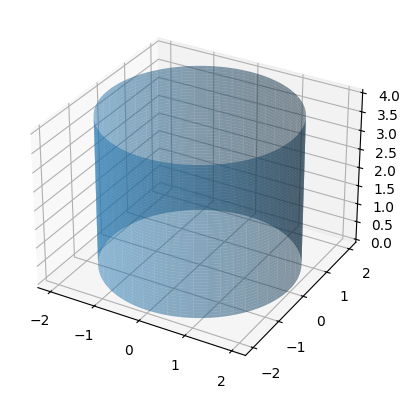

In [6]:
# Draw Cylinder aligned with z axis
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

Xc, Yc, Zc = get_cylinder(2, 4)
# end_cap = [Xc[0], Yc[0], Zc[0]]

ax.plot_surface(Xc, Yc, Zc, alpha=0.5)
plt.show()

/tmp/ipykernel_10409/2362987715.py:39: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contourf(x, y, z, zdir="x", offset=zmin, colors="C0", labels="YZ")


['ArtistList', 'M', '_3d_extend_contour', '_AxesBase__clear', '_PROPERTIES_EXCLUDED_FROM_SET', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_contourf_set', '_add_text', '_adjustable', '_agg_filter', '_alias_map', '_alpha', '_anchor', '_animated', '_aspect', '_auto_scale_contourf', '_autotitlepos', '_axes', '_axes_locator', '_axis3don', '_axis_map', '_axis_names', '_axisbelow', '_box_aspect', '_button_press', '_button_release', '_calc_coord', '_calc_view_axes', '_callbacks', '_check_no_units', '_children', '_clipon', '_clippath', '_cm_set', '_colorbars', '_convert_dx', '_current_image', '_different_canvas', '_dist', '_draw_grid', '_equal_aspect_axis_indices

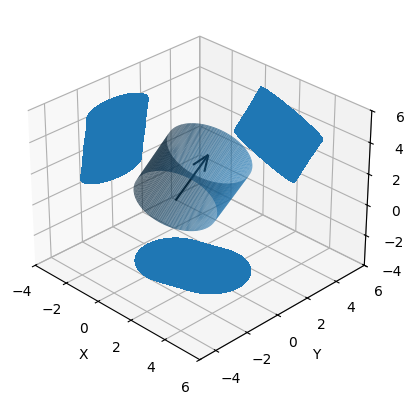

In [5]:
# Draw Cylinder aligned with an arbitrary vector
#   also draws the projection of the cylinder on the xy, xz, and yz planes
import numpy as np
import functools
from matplotlib.patches import Circle
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d

v = np.array([3, 1, 7])

vu = v / np.linalg.norm(v)

Xc, Yc, Zc = get_cylinder(2, 4)

R = rotate_z_to_vector(vu)
t = np.transpose(np.array([Xc, Yc, Zc]))
x, y, z = np.transpose(t @ R, (2, 0, 1))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
zmin = -4

ax.plot_surface(x, y, z, alpha=0.7)

# Drawing the vector v
ax.quiver(0, 0, 0, 1.5, 0.5, 3.5, color="black")

# ax.contourf(x, y, z, zdir='z', offset=-1, cmap='Greys', alpha = .5) #'coolwarm')
ax.contourf(x, y, z, zdir="z", offset=zmin, colors="C0")

# Drawing a circle to fill in gap left by contourf
# represents the end cap of the cylinder
# hard coded for this example for simplicity
p = Circle((0.5, 0.15), 1.77)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=zmin, zdir="z")  # , color = 'Grey')


plt.contourf(x, y, z, zdir="x", offset=zmin, colors="C0", labels="YZ")
# yz_contour.collections[0].set_label('YZ')
ax.contourf(x, y, z, zdir="y", offset=6, colors="C0")


ax.view_init(elev=30, azim=-45, roll=0)
ax.set(xlim=(-4, 6), ylim=(-5, 6), zlim=(zmin, 6), xlabel="X", ylabel="Y", zlabel="Z")

print(dir(ax))
plt.savefig("3d_cyl_projections.svg")
plt.show()